In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/afnan47/sem7/raw/main/ML/3.%20Neural%20Network/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
x = df[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']

In [10]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_res,y_res = ros.fit_resample(x,y)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x_res)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_res,test_size=0.2,random_state=0)

In [21]:
from sklearn.neural_network import MLPClassifier
ann =  MLPClassifier(hidden_layer_sizes=(100,100,100) , random_state = 0 , max_iter = 500, activation = 'relu')

In [22]:
ann.fit(x_train,y_train)
pred = ann.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [24]:
accuracy_score(y_test,pred)

0.9026993094789705

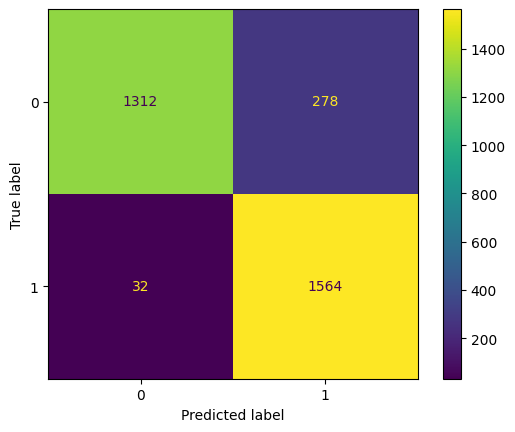

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.89      1590
           1       0.85      0.98      0.91      1596

    accuracy                           0.90      3186
   macro avg       0.91      0.90      0.90      3186
weighted avg       0.91      0.90      0.90      3186

